<h2>Solutions MIP Ex. 3</h2>

Please note that Task 2 is not relevant for the exam.

<h3>Task 1: Contrast Enhancement</h3>

(<matplotlib.text.Text at 0x7f2b347ce9e8>,
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

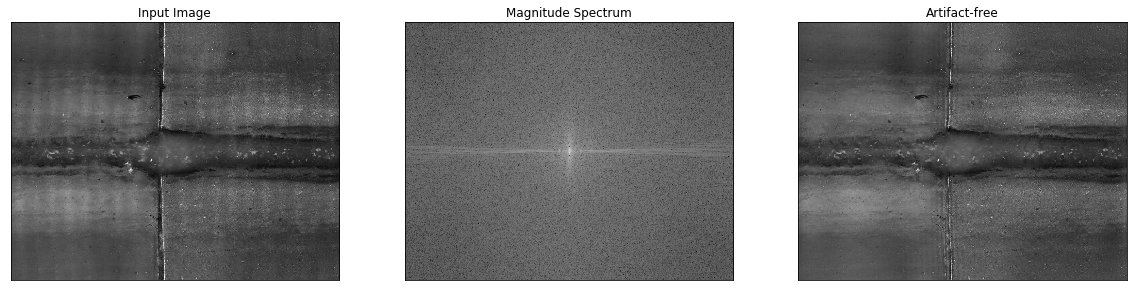

In [4]:
%matplotlib inline
import cv2
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pylab as plt
from scipy import fftpack
plt.rcParams["figure.figsize"] = (20,15)
img = mpimg.imread('sewer.jpg')

# no. of rows, cols in image
rows, cols, depth = img.shape

# center coordinates
crow, ccol = int(rows/2) , int(cols/2)

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

img = rgb2gray(img)


# YOUR CODE HERE
#magnitude_spectrum = img_back = img # enter code as necessary
f = np.fft.fft2(img)
f_shift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(f_shift))

rows=img.shape[0]
columns=img.shape[1]
cen_row = f.shape[0]/2        # number of rows/2
cen_column = f.shape[1]/2        # number of columns/2   
fshift2 = np.copy(f_shift)

# create a mask first, center square is 1, remaining all zeros
mask = np.ones((rows,cols),np.uint8)
mask[crow-10:crow+10, ccol-60:ccol-10] = 0
mask[crow-10:crow+10, ccol+10:ccol+60] = 0

# apply mask and inverse DFT
fshift = f_shift*mask
f_ishift = np.fft.ifftshift(fshift)
d_shift = np.array(np.dstack([f_ishift.real,f_ishift.imag]))
img_back = cv2.idft(d_shift)
img_back = cv2.idft(d_shift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])


# END OF YOUR CODE


plt.subplot(131), plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132)
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img_back, cmap = 'gray')
plt.title('Artifact-free'), plt.xticks([]), plt.yticks([])

<h2>Solutions MIP Ex. 2</h2>

<h3>Task 3: Relevance of the Phase</h3>

(<matplotlib.text.Text at 0x7f2b344c2a90>,
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

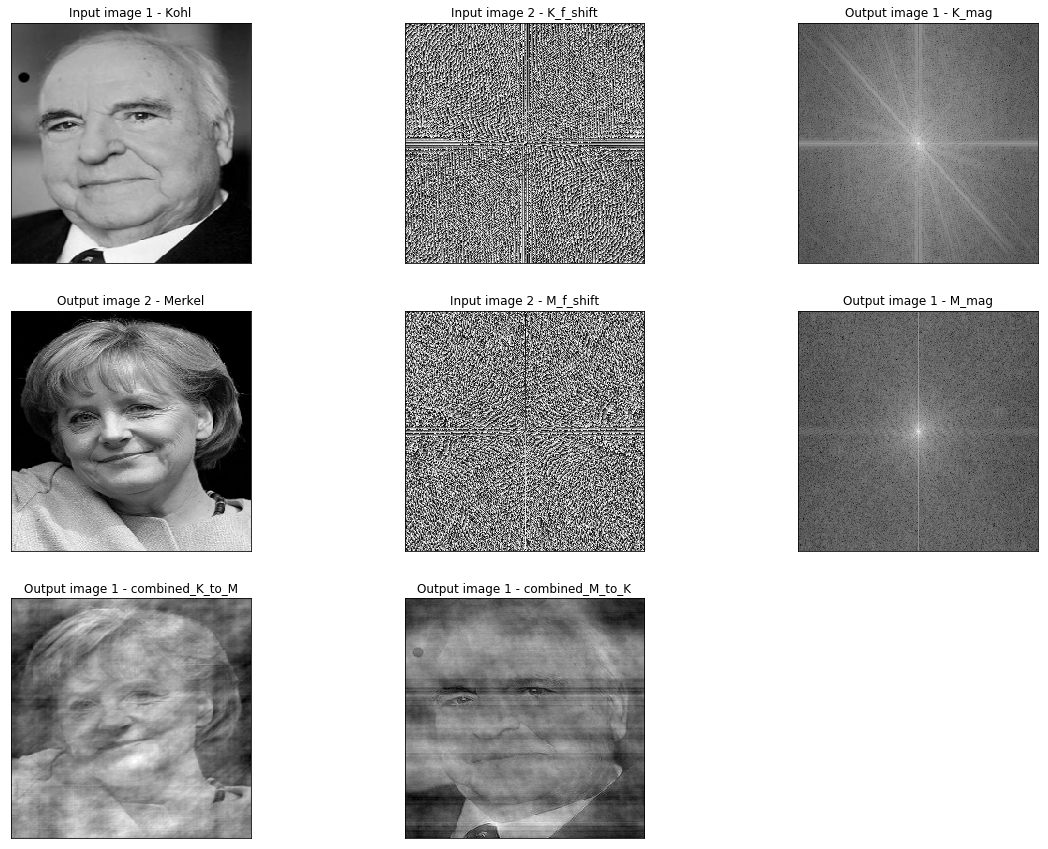

In [5]:
# YOUR CODE HERE
%matplotlib inline
import cv2
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack

plt.rcParams["figure.figsize"] = (20,15)
kohl = plt.imread('kohl.png')
merkel = mpimg.imread('merkel.png')

K_f = np.fft.fft2(kohl)
K_f_shift = np.fft.fftshift(K_f)
K_mag = 20*np.log(np.abs(K_f_shift)) #magnitude
K_f_phase = np.angle(K_f_shift) # phase 

M_f = np.fft.fft2(merkel)
M_f_shift = np.fft.fftshift(M_f)
M_mag = 20*np.log(np.abs(M_f_shift))
M_f_phase = np.angle(M_f_shift)


combined_K_to_M = np.multiply(np.abs(K_f), np.exp(1j*np.angle(M_f)))
imgCombined_K_to_M = np.real(np.fft.ifft2(combined_K_to_M))

combined_M_to_K = np.multiply(np.abs(M_f), np.exp(1j*np.angle(K_f)))
imgCombined_M_to_K = np.real(np.fft.ifft2(combined_M_to_K))


plt.subplot(331), plt.imshow(kohl, cmap='gray')
plt.title('Input image 1 - Kohl'), plt.xticks([]), plt.yticks([])
plt.subplot(332), plt.imshow(K_f_phase, cmap='gray')
plt.title('Input image 2 - K_f_shift'), plt.xticks([]), plt.yticks([])
plt.subplot(333), plt.imshow(K_mag, cmap='gray')
plt.title('Output image 1 - K_mag'), plt.xticks([]), plt.yticks([])
plt.subplot(334), plt.imshow(merkel, cmap='gray')
plt.title('Output image 2 - Merkel'), plt.xticks([]), plt.yticks([])
plt.subplot(335), plt.imshow(M_f_phase, cmap='gray')
plt.title('Input image 2 - M_f_shift'), plt.xticks([]), plt.yticks([])
plt.subplot(336), plt.imshow(M_mag, cmap='gray')
plt.title('Output image 1 - M_mag'), plt.xticks([]), plt.yticks([])

plt.subplot(337), plt.imshow(imgCombined_K_to_M, cmap='gray')
plt.title('Output image 1 - combined_K_to_M'), plt.xticks([]), plt.yticks([])

plt.subplot(338), plt.imshow(imgCombined_M_to_K, cmap='gray')
plt.title('Output image 1 - combined_M_to_K'), plt.xticks([]), plt.yticks([])